#데이터 탐색
##1. 데이터 읽어오기
>이전에 저장한 클리닝 데이터를 읽어 들이자

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/1. 데이터 분석을 위한 기초 통계 수학/3. 파이프라인/data/titanic_cleaning.csv')
df

##2. 데이터 구간화(data binning)
> 연령대 별로 생존 유무를 파악하려 한다. 다음과 같이 구간화해보자
* 미성년 : 1 ~ 20
* 성년 : 21 ~ 60
* 노년 : 61~100

In [6]:
bins=[1,20,60,100]
df['age_class'] = pd.cut(df['Age'], bins, labels=['미성년', '성년', '노년'])

In [ ]:
df.isnull().sum()

>현재 age값에 결측치가 존재한다.

In [ ]:
df[df['Age']<2]['Age'].describe()

count    14.000000
mean      0.869286
std       0.174376
min       0.420000
25%       0.770000
50%       0.960000
75%       1.000000
max       1.000000
Name: Age, dtype: float64

>범위를 1부터 하면 1이 제외된다. 위의 결과를 보면 나이는 1보다 작은 값도 있다.

In [ ]:
bins=[0,20,60,100]
df['age_class'] = pd.cut(df['Age'], bins, labels=['미성년', '성년', '노년'])

##3. 데이터 필터링
> 데이터 가공 시 중복데이터를 제거한다거나 필요한 데이터만 분류하는 경우가 자주 발생된다. 여기선 이러한 필터링 방법에 대해 알아보자

In [ ]:
# df['age_class']
df['age_class'].unique()

['성년', '미성년', '노년']
Categories (3, object): ['미성년' < '성년' < '노년']

> 위의 코드는 중복데이터를 제거하는 방법이다. df에서 age_class는 기존에 추가한 나이별 분류 데이터이다. unique함수를 이용하면 age_class열에 있는 값들의 중복을 제거할 수 있다.

In [ ]:
df[df['age_class'].isin(['미성년'])]

>특정 데이터만 추출하여 분석할 경우 isin을 사용한다. 여기서는 미성년만 포함된 데이터 추출을 위해 미성년만 사용했으며 여러 데이터들을 포함 시킬 수도 있다.

In [ ]:
df[~df['age_class'].isin(['미성년'])]

>~(틸트)는 보통 not의 의미를 갖는다. 여기서는 미성년이 포함되지 않은 데이터를 추출하기 위해 사용되었다.

In [ ]:
df_one_hot=pd.DataFrame()
df_one_hot['Sex'] = df['Sex'].astype('category')
df_one_hot['Pclass'] = df['Pclass'].astype('category')
df_one_hot['Embarked'] = df['Embarked'].astype('category')
df_one_hot = pd.get_dummies(df_one_hot)
df_one_hot


> 기존에 배웠던 원-핫 인코딩을 사용해 본 예제이다. 여기서는 사용되지 않는다.

##4. 생존률 분석
> 여러 상황에 따른 생존률을 알아보자
###4.1 unstack

In [8]:
df_group_survived_mean = df.groupby(['Sex', 'age_class', 'Pclass'])['Survived'].mean()
df_group_survived_mean

Sex     age_class  Pclass
female  미성년        1         0.928571
                   2         1.000000
                   3         0.465116
        성년         1         0.974359
                   2         0.900000
                   3         0.489583
        노년         1         1.000000
                   2              NaN
                   3         1.000000
male    미성년        1         0.500000
                   2         0.357143
                   3         0.180556
        성년         1         0.388350
                   2         0.069767
                   3         0.119850
        노년         1         0.083333
                   2         0.333333
                   3         0.000000
Name: Survived, dtype: float64

>우선 성별, 연령대별, 객실 등급별 생존율에 대해 알아 보자

> 위와 같이 성별, 연령대별, 객실 등급별 생존 데이터에 대한 평균을 구한다. 세 가지경우를 필터링 하여 결과가 보기 좋지 않다.

In [9]:
df_group_survived_mean_unstack = df_group_survived_mean.unstack('age_class')
df_group_survived_mean_unstack

age_class           미성년        성년        노년
Sex    Pclass                              
female 1       0.928571  0.974359  1.000000
       2       1.000000  0.900000       NaN
       3       0.465116  0.489583  1.000000
male   1       0.500000  0.388350  0.083333
       2       0.357143  0.069767  0.333333
       3       0.180556  0.119850  0.000000

> unstack은 행과 열을 교환하는 작업을 진행한다. 위의 코드를 실행하면 기존에 열로되어 있던 객실 등급 정보를 행 index로 변환시켜 준 것을 볼 수 있다.

###4.2 pivot_table

In [ ]:
df.pivot_table(['Survived'], index=['Sex'],)

,Survived
Sex,
female,0.742038
male,0.188908


>위와 같이 성별 생존률을 확인할 수 있다.

In [ ]:
df.pivot_table(['Survived'], index=['Sex', 'Pclass'])

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

> 다중 처리를 위해서는 index에 여러 열을 입력하면 된다.

In [ ]:
df.pivot_table(['Survived'], index=['Sex', 'Pclass'], aggfunc='count')

Survived
Sex    Pclass          
female 1             94
       2             76
       3            144
male   1            122
       2            108
       3            347

>aggfunc은 기본값이 평균이며 위처럼 다른 여러 정보들을 입력하여 처리할 수도 있다.

> 이처럼 다양한 방법으로 생존 정보를 확인할 수 있다.

## 5. 자동 보고서 만들기
> colab에서는 기본적으로 pandas-profiling이 설치되어 있지만 버전이 낮아 profile_report()함수가 없었다(2021.05.31 기준) 다음과 같이 pip를 이용하여 업데이트 한 후 report를 확인해 보자

In [ ]:
!pip install -U pandas-profiling

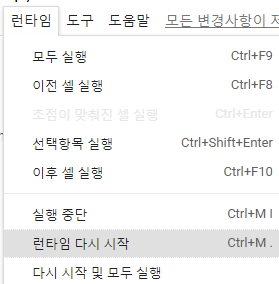

> 위의 코드 실행 후 런타임->런타임 다시 시작  클릭

In [ ]:
import pandas_profiling

report = df.profile_report()
# report
report.to_file('/content/drive/MyDrive/1. 데이터 분석을 위한 기초 통계 수학/3. 파이프라인/data/titanic_report.html')

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]